In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime 

### This is link of Source 
https://platform.stratascratch.com/data-projects/delivery-duration-prediction

In [2]:
# Read the File 
df = pd.read_csv("historical_data.csv")

In [3]:
backup = df.copy()
# its useful for big dataset, loading again a dataset can take a time

In [4]:
df.head()
# observe the data

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [5]:
df.describe()
# need some data cleaning 
# avg 3 items are ordered by coustomers
# estimate avg time to
# avg time from res to cust is 9 min and max is 34 min

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


In [6]:
df.info()
# here we can see col (1,2) need to be datetime insted object
# in big dataset int and float conversion also matters


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

### Convert datatype from object to datetime

In [7]:
df.created_at = pd.to_datetime(df.created_at)
df.actual_delivery_time = pd.to_datetime(df.actual_delivery_time)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

## Feature Creation or Engineering 

### Let's Start with Target variable 
#### Total del Time = Time at delivery  - Order creation at

In [9]:
# doordash to rest >> food prep >> rest to coustomer 
# lets  calculate total non prep duration 
df['total_del_time'] = df.actual_delivery_time - df.created_at
df['non_prep_duration'] = df['estimated_store_to_consumer_driving_duration']+ df['estimated_order_place_duration']

In [10]:
df['total_del_time']=df['total_del_time'].astype('timedelta64[s]')

In [11]:
df.info()
# any operation between datetime cols gives time delta  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 18 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

### Busy Dashers Ratio
- the number of busy and available dashers is At the time of order creation 
- and it changes time to time 
- we will create new variable busy dashers ratio = busy / onshift dashers

In [12]:
df['busy_dashers_ratio'] = df.total_busy_dashers / df.total_onshift_dashers
# high busy dashers ratio means longer delivery duaration 

In [13]:
df.info()
# now here total del time is time delta and i have to extract time in min to calculate total prp time 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 19 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

# data preparation for modeling 


In [14]:
# Let's use one-hot encoding for id's
# check id's and decide to encode or not 
df.market_id.nunique()

6

In [15]:
df.store_id.nunique()
# can't use for one-hot encoding

6743

In [16]:
df.order_protocol.nunique()

7

- From observation we can apply one hot encoding on market id and order protocol
- not on store id

In [17]:
# using get_dummies function in pandas
# for market_id

market_id_dummies = pd.get_dummies(df.market_id).add_prefix('market_id')
market_id_dummies 

,market_id1.0,market_id2.0,market_id3.0,market_id4.0,market_id5.0,market_id6.0
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
197423,1,0,0,0,0,0
197424,1,0,0,0,0,0
197425,1,0,0,0,0,0
197426,1,0,0,0,0,0


In [18]:
order_protocol_dummies = pd.get_dummies(df.order_protocol).add_prefix('order_protocol')
order_protocol_dummies 

,order_protocol1.0,order_protocol2.0,order_protocol3.0,order_protocol4.0,order_protocol5.0,order_protocol6.0,order_protocol7.0
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
197423,0,0,0,1,0,0,0
197424,0,0,0,1,0,0,0
197425,0,0,0,1,0,0,0
197426,1,0,0,0,0,0,0


- store catogary col has lot of null values and can be fill with most common store id catogary 
- for that we are going to create reference dictionary 
- map each store_id to most frequent cuisne catogary they have 

In [19]:
# we have calculated most frequent catogary for perticular store id and converted into dict
store_id_unique = df.store_id.unique().tolist()
store_id_and_category = {store_id: df[df.store_id == store_id].store_primary_category.mode() 
                        for store_id in store_id_unique}

In [20]:
store_id_and_category

{1845: 0    american
 Name: store_primary_category, dtype: object,
 5477: 0     indian
 1    mexican
 Name: store_primary_category, dtype: object,
 2841: 0    italian
 Name: store_primary_category, dtype: object,
 4139: 0    mexican
 Name: store_primary_category, dtype: object,
 5058: 0    italian
 Name: store_primary_category, dtype: object,
 4149: 0    sandwich
 1        thai
 Name: store_primary_category, dtype: object,
 3201: 0    cafe
 Name: store_primary_category, dtype: object,
 5054: 0    italian
 Name: store_primary_category, dtype: object,
 2004: 0    american
 Name: store_primary_category, dtype: object,
 1984: 0    chinese
 Name: store_primary_category, dtype: object,
 4905: 0    mexican
 Name: store_primary_category, dtype: object,
 1698: 0    sandwich
 Name: store_primary_category, dtype: object,
 1936: 0    singaporean
 Name: store_primary_category, dtype: object,
 6015: 0    burger
 Name: store_primary_category, dtype: object,
 976: 0    breakfast
 Name: store_primary_c

In [21]:
 
def fill(store_id):
    # return primary store catogary from the dictionary 
    try:
        return store_id_and_category[store_id].values[0]
    except:
        return np.nan

df['nan_free_store_primary_category'] = df.store_id.apply(fill)

- now it is ready to one hot encode 
- create dummies for store primary category

In [22]:
store_primary_category_dummies = pd.get_dummies(df.nan_free_store_primary_category).add_prefix('category_')
store_primary_category_dummies

,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Lets drop the original columns and replace it with these features 

In [23]:
train_df = df.drop( columns = ['created_at' , 'market_id' , 'store_id', 'order_protocol' ,'store_primary_category' , 'actual_delivery_time' , 'nan_free_store_primary_category', 
                          'total_busy_dashers','total_onshift_dashers'])
df.head()     

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_del_time,non_prep_duration,busy_dashers_ratio,nan_free_store_primary_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242,american
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000,indian
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000,indian
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000,indian
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000,indian


In [24]:
# concat all col together
train_df = pd.concat([train_df, order_protocol_dummies, market_id_dummies, store_primary_category_dummies],axis=1)

In [25]:
train_df

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_del_time,non_prep_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4,3441,4,557,1239,21.0,446,861.0,3779.0,1307.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1900,1,1400,1400,2.0,446,690.0,4024.0,1136.0,...,0,0,0,0,0,0,0,0,0,0
2,1,1900,1,1900,1900,0.0,446,690.0,1781.0,1136.0,...,0,0,0,0,0,0,0,0,0,0
3,6,6900,5,600,1800,2.0,446,289.0,3075.0,735.0,...,0,0,0,0,0,0,0,0,0,0
4,3,3900,3,1100,1600,9.0,446,650.0,2390.0,1096.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,3,1389,3,345,649,23.0,251,331.0,3907.0,582.0,...,0,0,0,0,0,0,0,0,0,0
197424,6,3010,4,405,825,14.0,251,915.0,3383.0,1166.0,...,0,0,0,0,0,0,0,0,0,0
197425,5,1836,3,300,399,40.0,251,795.0,3008.0,1046.0,...,0,0,0,0,0,0,0,0,0,0
197426,1,1175,1,535,535,12.0,446,384.0,3907.0,830.0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
train_df.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_del_time,non_prep_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
count,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,197428.000000,196902.000000,1.974210e+05,196902.000000,...,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000
mean,3.196391,2682.331402,2.670791,686.218470,1159.588630,58.050065,308.560179,545.358935,2.908257e+03,853.939183,...,0.000815,0.000187,0.005465,0.011300,0.000740,0.037254,0.001175,0.001433,0.004234,0.030928
std,2.666546,1823.093688,1.630255,522.038648,558.411377,52.661830,90.139653,219.352902,1.922961e+04,235.112835,...,0.028545,0.013689,0.073725,0.105701,0.027184,0.189384,0.034260,0.037834,0.064935,0.173122
min,1.000000,0.000000,1.000000,-86.000000,0.000000,-6.000000,0.000000,0.000000,1.010000e+02,153.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,251.000000,382.000000,2.104000e+03,683.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2200.000000,2.000000,595.000000,1095.000000,41.000000,251.000000,544.000000,2.660000e+03,850.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,3395.000000,3.000000,949.000000,1395.000000,85.000000,446.000000,702.000000,3.381000e+03,1017.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,411.000000,27100.000000,20.000000,14700.000000,14700.000000,285.000000,2715.000000,2088.000000,8.516859e+06,3222.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
train_df.busy_dashers_ratio.describe()
# there is problem with infinite values 
# lets leplace it with nan values

count    1.775900e+05
mean              NaN
std               NaN
min              -inf
25%      8.269231e-01
50%      9.622642e-01
75%      1.000000e+00
max               inf
Name: busy_dashers_ratio, dtype: float64

In [28]:
# check infinity values with using numpy isfinite() function
np.where(np.any(~np.isfinite(train_df),axis=0) == True)

(array([ 5,  7,  8,  9, 10], dtype=int64),)

In [29]:
# replace inf values with nan 
train_df.replace([np.inf , -np.inf], np.nan , inplace = True)

In [30]:
train_df.shape

(197428, 98)

In [31]:
# now lets drop all nan values from our dataset
train_df.dropna(inplace=True)

In [32]:
train_df.shape

(177070, 98)

## now we have to remove redundancy

- big dataset help our model yet it has drawbacks too
- when you have too many predictors it will slow us down and caous collinerity
- collineraity means that the variables are corelated to each other
- both of them have same effect on model so one of them is sufficient for your model 

In [33]:
# lets draw correlation matrix 
# it could take some time to run this cell, we are calculating 100*100 matrix
# to have better visualization we will take only one triangle 

# generate mask for the upper triangle 

corr = train_df.corr()
mask = np.triu(np.ones_like(corr, dtype= bool))

# here we assign 1 to upper part of diagonal and 0  to lower and apply mask where value is 1

<Axes: >

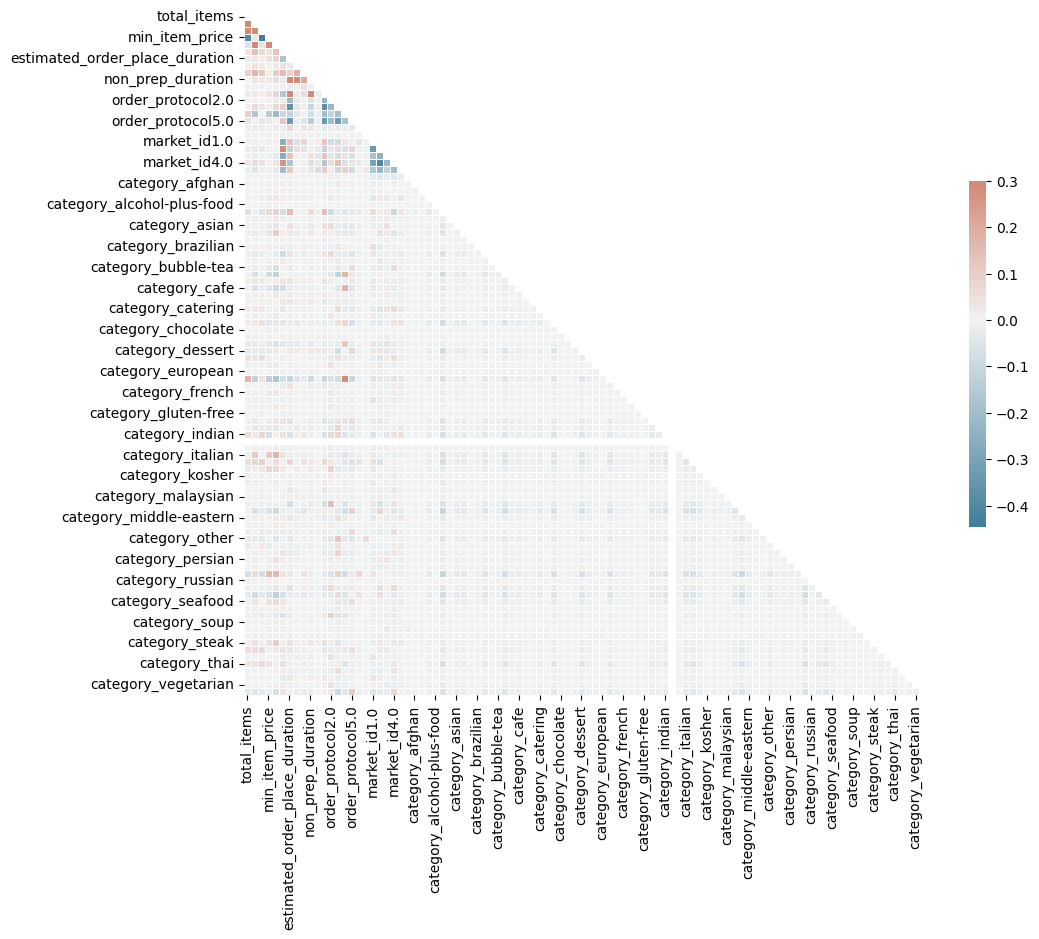

In [34]:
#set up the matplotlib figure
f, ax = plt.subplots(figsize = (11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# lets draw heatmap with the mask and correct aspect ratio
sns.heatmap(corr ,mask=mask, cmap=cmap , vmax = .3, center = 0, square=True, 
            linewidths = .5, cbar_kws = {'shrink': .5})

In [35]:
# there is something wrong with category indonesian 
train_df.category_indonesian.describe()
# we have bunch of 0 values so we can drop it 

count    177070.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: category_indonesian, dtype: float64

- Two functions to test correlations
- 1 get redundant values
- 2 find top correlated features

In [36]:
def get_redundant_pairs(df):
    #get diagonal and lower triangular pairs of correlation matrix
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [37]:
def get_top_abs_correlations (df, n = 5):

#Sort correlations in the descending order and return n highest results

    au_corr = df.corr().abs().unstack()
    
    labels_to_drop = get_redundant_pairs(df)
    
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    
    return au_corr[0:n]
    

In [38]:
print("Top Absolute Correlations")

print(get_top_abs_correlations (train_df, 20))

Top Absolute Correlations
estimated_store_to_consumer_driving_duration  non_prep_duration     0.923086
estimated_order_place_duration                order_protocol1.0     0.897645
total_items                                   num_distinct_items    0.758146
subtotal                                      num_distinct_items    0.682890
total_items                                   subtotal              0.557175
min_item_price                                max_item_price        0.541241
subtotal                                      max_item_price        0.507947
order_protocol4.0                             category_fast         0.489946
num_distinct_items                            min_item_price        0.446733
market_id2.0                                  market_id4.0          0.402421
total_items                                   min_item_price        0.389277
order_protocol1.0                             order_protocol3.0     0.373581
estimated_order_place_duration                orde

- we will drop some corelated features 

In [39]:
train_df = df.drop( columns = ['created_at' , 'market_id' , 'store_id', 'order_protocol' ,'store_primary_category' , 'actual_delivery_time' , 'nan_free_store_primary_category', 
                          'total_busy_dashers','total_onshift_dashers'])
df.head()  

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_del_time,non_prep_duration,busy_dashers_ratio,nan_free_store_primary_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242,american
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000,indian
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000,indian
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000,indian
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000,indian


In [40]:
# concat  col together
train_df = pd.concat([train_df, order_protocol_dummies, store_primary_category_dummies],axis=1)


train_df = train_df.drop( columns =['category_indonesian','non_prep_duration'])

# align dtype over dataset

train_df = train_df.astype("float32")

#replace inf values with nan to drop all nan
train_df.replace ([np.inf, -np.inf], np.nan, inplace = True)
train_df.dropna(inplace = True)

train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_del_time,busy_dashers_ratio,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1781.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3075.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2390.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
train_df.shape

(177070, 90)

In [42]:
# check correlation again
print("Top Absolute Correlations")

print(get_top_abs_correlations (train_df, 20))

Top Absolute Correlations
estimated_order_place_duration  order_protocol1.0     0.897645
total_items                     num_distinct_items    0.758146
subtotal                        num_distinct_items    0.682890
total_items                     subtotal              0.557175
min_item_price                  max_item_price        0.541241
subtotal                        max_item_price        0.507947
order_protocol4.0               category_fast         0.489946
num_distinct_items              min_item_price        0.446733
total_items                     min_item_price        0.389277
order_protocol1.0               order_protocol3.0     0.373581
estimated_order_place_duration  order_protocol3.0     0.364170
order_protocol1.0               order_protocol5.0     0.342345
estimated_order_place_duration  order_protocol5.0     0.333291
order_protocol3.0               order_protocol5.0     0.332533
order_protocol1.0               order_protocol2.0     0.226903
estimated_order_place_duratio

In [43]:
# order protocol are related to each other
# lets drop corelated features again and repeat the code

In [44]:
train_df = df.drop( columns = ['created_at' , 'market_id' , 'store_id', 'order_protocol' ,'store_primary_category' , 'actual_delivery_time' , 'nan_free_store_primary_category', 
                          'total_busy_dashers','total_onshift_dashers'])
# concat  col together
train_df = pd.concat([train_df, store_primary_category_dummies],axis=1)


train_df = train_df.drop( columns =['category_indonesian','non_prep_duration'])

# align dtype over dataset
train_df = train_df.astype("float32")

#replace inf values with nan to drop all nan
train_df.replace ([np.inf, -np.inf], np.nan, inplace = True)
train_df.dropna(inplace = True)

train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_del_time,busy_dashers_ratio,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1781.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3075.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2390.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# check correlation again
print("Top Absolute Correlations")

print(get_top_abs_correlations (train_df, 20))

Top Absolute Correlations
total_items                                   num_distinct_items                0.758146
subtotal                                      num_distinct_items                0.682890
total_items                                   subtotal                          0.557175
min_item_price                                max_item_price                    0.541241
subtotal                                      max_item_price                    0.507947
num_distinct_items                            min_item_price                    0.446733
total_items                                   min_item_price                    0.389277
estimated_store_to_consumer_driving_duration  total_del_time                    0.188418
subtotal                                      total_del_time                    0.172312
total_outstanding_orders                      estimated_order_place_duration    0.171049
total_items                                   category_fast                     0.17

- we still have some correlated features
- let's try feture engineering - we create new variables to simplify the model and increase its accuracy by using new variables
  

# new features

In [46]:
train_df['percent_distinct_item_of_total'] = train_df.num_distinct_items / train_df.total_items
train_df['avg_price_per_item'] = train_df.subtotal / train_df.total_items
train_df.drop(columns = ['num_distinct_items' , 'subtotal'],inplace=True)
# check correlation again
print("Top Absolute Correlations")

print(get_top_abs_correlations (train_df, 20))

Top Absolute Correlations
min_item_price                                avg_price_per_item                0.860580
max_item_price                                avg_price_per_item                0.770382
min_item_price                                max_item_price                    0.541241
total_items                                   percent_distinct_item_of_total    0.445751
                                              min_item_price                    0.389277
                                              avg_price_per_item                0.310759
percent_distinct_item_of_total                avg_price_per_item                0.226711
category_pizza                                avg_price_per_item                0.225510
estimated_store_to_consumer_driving_duration  total_del_time                    0.188418
max_item_price                                percent_distinct_item_of_total    0.178021
category_fast                                 avg_price_per_item                0.17

In [47]:
train_df['price_range_of_items'] = train_df.max_item_price - train_df.min_item_price
train_df.drop(columns = ['min_item_price' , 'max_item_price'],inplace=True)

print("Top Absolute Correlations")
print(get_top_abs_correlations (train_df, 20))

Top Absolute Correlations
total_items                                   percent_distinct_item_of_total    0.445751
                                              price_range_of_items              0.333304
                                              avg_price_per_item                0.310759
percent_distinct_item_of_total                avg_price_per_item                0.226711
category_pizza                                avg_price_per_item                0.225510
estimated_store_to_consumer_driving_duration  total_del_time                    0.188418
category_fast                                 avg_price_per_item                0.175950
total_outstanding_orders                      estimated_order_place_duration    0.171049
total_items                                   category_fast                     0.170988
category_italian                              avg_price_per_item                0.158193
total_outstanding_orders                      total_del_time                    0.15

In [48]:
train_df.shape

(177070, 82)

### Multicollinearity and feature selection

In [49]:
# VIF(variance inflation factor ) factor quantifies the severity of multicollinerity
# it may cause overfitting
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [50]:
# this funtion compute the vif score
def compute_vif(features):
    vif_data=pd.DataFrame()
    vif_data['features']=features
    vif_data['VIF']=[variance_inflation_factor(train_df[features].values,i) for i in range(len(features))]
    return vif_data.sort_values(by=['VIF']).reset_index(drop=True)

In [51]:
train_df.columns

Index(['total_items', 'total_outstanding_orders',
       'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'total_del_time',
       'busy_dashers_ratio', 'category_afghan', 'category_african',
       'category_alcohol', 'category_alcohol-plus-food', 'category_american',
       'category_argentine', 'category_asian', 'category_barbecue',
       'category_belgian', 'category_brazilian', 'category_breakfast',
       'category_british', 'category_bubble-tea', 'category_burger',
       'category_burmese', 'category_cafe', 'category_cajun',
       'category_caribbean', 'category_catering', 'category_cheese',
       'category_chinese', 'category_chocolate', 'category_comfort-food',
       'category_convenience-store', 'category_dessert', 'category_dim-sum',
       'category_ethiopian', 'category_european', 'category_fast',
       'category_filipino', 'category_french', 'category_gastropub',
       'category_german', 'category_gluten-free', 'category_gree

In [52]:
features= train_df.drop(columns=['total_del_time']).columns.to_list()


In [53]:
#lets apply above funtion
vif_data=compute_vif(features)
vif_data

,features,VIF
0,category_alcohol-plus-food,1.000371
1,category_chocolate,1.000498
2,category_belgian,1.000760
3,category_russian,1.003231
4,category_african,1.003823
...,...,...
76,busy_dashers_ratio,6.369601
77,category_american,7.033604
78,estimated_store_to_consumer_driving_duration,7.210845
79,estimated_order_place_duration,13.472278


- we are going to drop features who have vif score over 20

In [57]:
multicollinearity = True

while multicollinearity:
    highest_vif_feature = vif_data['features'].values.tolist()[-1]
    print('I will remove:', highest_vif_feature)
    
    if highest_vif_feature in features:
        features.remove(highest_vif_feature)
    
    vif_data = compute_vif(features)
    multicollinearity = len(vif_data[vif_data.VIF > 20]) != 0

selected_features = vif_data['features'].values.tolist()
vif_data

I will remove: percent_distinct_item_of_total


,features,VIF
0,category_alcohol-plus-food,1.000222
1,category_chocolate,1.000369
2,category_belgian,1.000461
3,category_russian,1.002022
4,category_gluten-free,1.002372
...,...,...
75,category_american,4.505928
76,avg_price_per_item,5.958972
77,busy_dashers_ratio,6.357889
78,estimated_store_to_consumer_driving_duration,7.192644


## Feature Selection
- to reduce the diamention of dataset
- remove the features that so not have a significant effect on model
- also it help our algo to work faster

- we are going to use PCA and Random Forest

### RANDOM FOREST WITH GINI IMPORTANCE
- to measure the importance of each feature
- find genie's importance

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = train_df[selected_features]
y = train_df['total_del_time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

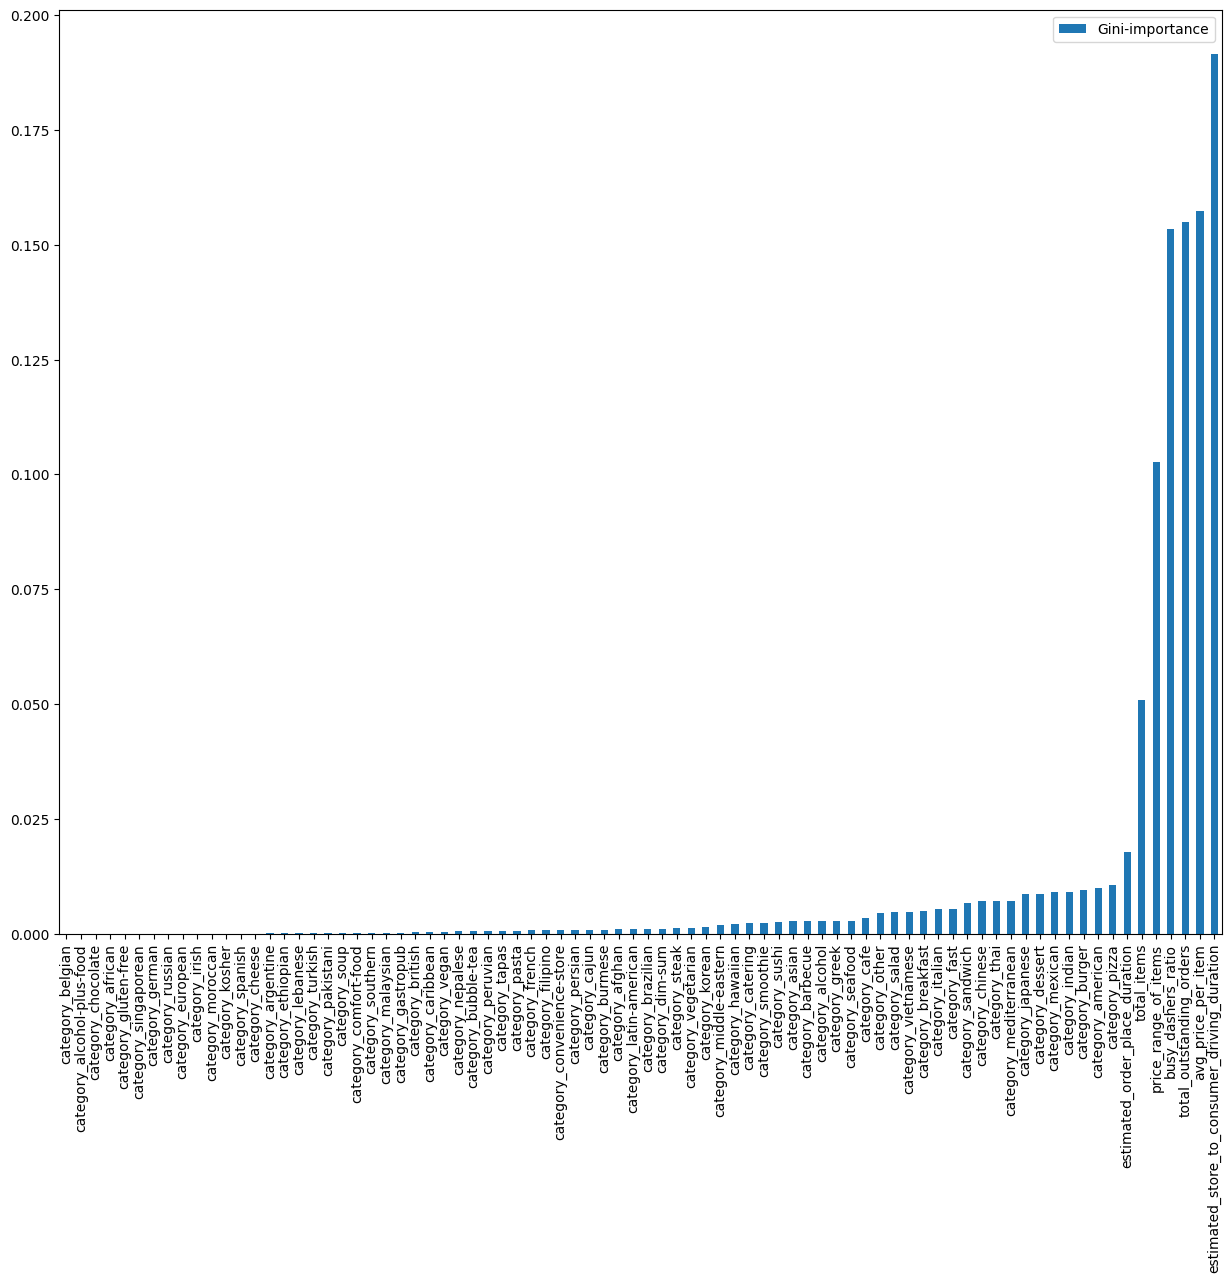

In [60]:
feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
feats = {}
for feature, importance in zip(X.columns, forest.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats,orient='index').rename(columns={0:'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar',rot=90,figsize=(15,12))
plt.show()

- this graph shows that busy dasher ratio, total outstanding order andav price per item are imp features for our model and also many other have slite efffect on our model

In [61]:
importances.sort_values(by='Gini-importance')[-35:].index.tolist()
# these are the features 

['category_middle-eastern',
 'category_hawaiian',
 'category_catering',
 'category_smoothie',
 'category_sushi',
 'category_asian',
 'category_barbecue',
 'category_alcohol',
 'category_greek',
 'category_seafood',
 'category_cafe',
 'category_other',
 'category_salad',
 'category_vietnamese',
 'category_breakfast',
 'category_italian',
 'category_fast',
 'category_sandwich',
 'category_chinese',
 'category_thai',
 'category_mediterranean',
 'category_japanese',
 'category_dessert',
 'category_mexican',
 'category_indian',
 'category_burger',
 'category_american',
 'category_pizza',
 'estimated_order_place_duration',
 'total_items',
 'price_range_of_items',
 'busy_dashers_ratio',
 'total_outstanding_orders',
 'avg_price_per_item',
 'estimated_store_to_consumer_driving_duration']

## PCA 
- hepls us to find the obtimum number of features to represent our model
- it is effective to reduce multiucollinearity

C:\Users\ROHAN\AppData\Local\Temp\ipykernel_25148\4069037631.py:11: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,81,1)


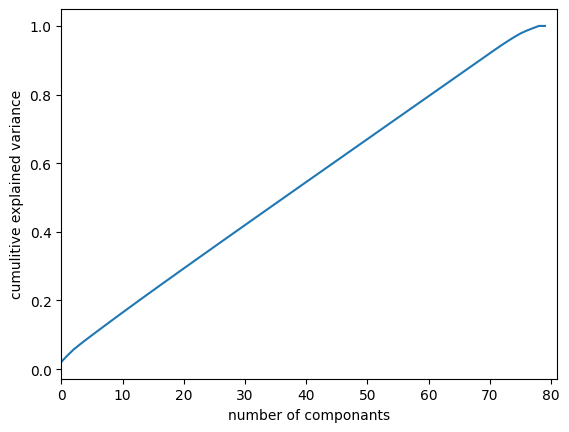

In [62]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 

X_Train = X_train.values
X_Train = np.asarray(X_train)


X_std=StandardScaler().fit_transform(X_Train)
pca=PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,81,1)
plt.xlabel('number of componants')
plt.ylabel("cumulitive explained variance")
plt.show()

- by using 60% percent of dataset the result can be explained by 80% 

#### methods for scaling 
- standard scalar
- min/max scaling

In [70]:
# standard scalar 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [71]:
def scale(scaler, X,y):
    X_scaler = scaler
    X_scaler.fit(X=X, y=y)
    X_scaled= X_scaler.transform(X)
    y_scaler= scaler
    y_scaler.fit(y.values.reshape(-1,1))
    y_scaled = y_scaler.transform(y.values.reshape(-1,1))
    
    return X_scaled,y_scaled,X_scaler,y_scaler

In [72]:
#example to show how to use it
X_scaled, y_scaled, X_scaler ,y_scaler = scale(MinMaxScaler(),X,y)

X_train_scaled, X_test_scaled, y_train_scaled,y_test_scaled = train_test_split(
            X_scaled, y_scaled, test_size=0.2,random_state=42)

In [73]:
from sklearn.metrics import mean_squared_error

def rmse_with_inv_transform(scaler, y_test,y_pred_scaled,model_name):
    y_predict=scaler.inverse_transform(y_pred_scaled.reshape(-1,1))
    
    rmse_error=mean_squared_error(y_test,y_predict[:,0],squared=False)
    print("error = "'{}'.format(rmse_error)+" in " + model_name)
    
    return rmse_error,y_predict

In [74]:
X_train.shape

(141656, 80)

In [75]:
train_df.shape

(177070, 82)

- we will apply 6 diff algoritms
- which will helps us to find the best performanced model
- we will also slect 4 diff feature set sizes (full,40,20,10)(selected by ginis importance)
- also we will apply 3 diff scalers (standrd, min-max, no scaler)

6 algo * 4 set size * 3 scalers = 72 results

In [84]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model

In [85]:
train_df.head()

,total_items,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_del_time,busy_dashers_ratio,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,...,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese,percent_distinct_item_of_total,avg_price_per_item,price_range_of_items
0,4.0,21.0,446.0,861.0,3779.0,0.424242,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,860.25,682.0
1,1.0,2.0,446.0,690.0,4024.0,2.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1900.00,0.0
2,1.0,0.0,446.0,690.0,1781.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1900.00,0.0
3,6.0,2.0,446.0,289.0,3075.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.833333,1150.00,1200.0
4,3.0,9.0,446.0,650.0,2390.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1300.00,500.0


In [86]:
X_train.shape

(141656, 80)

- lets began with defining custom funtion 

In [87]:
# lets create a custome function which will help us apply several regression tasks and calculate the error for each task

def make_regression(X_train,y_train,X_test,y_test,model,model_name,verbose=True):
    model.fit(X_train,y_train)
    y_predict=model.predict(X_train)
    train_error=mean_squared_error(y_train,y_predict,squared=False)
    y_predict=model.predict(X_test)
    test_error=mean_squared_error(y_test,y_predict,squared=False)
    if verbose:
        print("train error = {}".format(train_error) + " in " + model_name)
        print("test error = {}".format(test_error) + " in " + model_name)


    trained_model = model
    
    return trained_model, y_predict,train_error,test_error

In [ ]:
# we will define diff dict for diff parameters 

# 1 this is predict dictionary
pred_dict = {
    "regression_model": [],
    "feature_set": [],
    "scaler_name": [],
    "RMSE": []
}

# regresiion model contain 6 different models 
regression_models= {
    "Ridge": linear_model.Ridge(),
    "DecisionTree": tree.DecisionTreeRegressor(max_depth=6),
    "RandomForest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "LGBM": LGBMRegressor(),
    "MLP": MLPRegressor()
}

# here are our 4 feature datasets
feature_sets= {
    "full dataset" : X.columns.to_list(),
    "selected_features_40" : importances.sort_values(by='Gini-importance')[-40:].index.tolist(),
    "selected_features_20" : importances.sort_values(by='Gini-importance')[-20:].index.tolist(),
    "selected_features_10" : importances.sort_values(by='Gini-importance')[-10:].index.tolist(),
}

# scalers are 3
scalers= {
    "standard scaler": StandardScaler(),
    "MinMax Scaler": MinMaxScaler(),
    "NotScale":None,
}

#examin the error for each combination
# this for loop will take dataset 
for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    # this for loop will check that dataset for each scaler
    for scaler_name in scalers.keys():
        print(f"----------scaled with {scaler_name}-------- included columns are {feature_set_name}")
        print("")
        # this for loop will apply a dataset of a scaler for each model 
        for model_name in regression_models.keys():
            # first we calculate without scaler
            if scaler_name == "NotScale":
                X=train_df[feature_set]
                y=train_df['total_del_time']
                X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)
                make_regression(X_train,y_train,X_test,y_test,regression_models[model_name],model_name,verbose=True)
            else:
                X_scaled,y_scaled,X_scaler,y_scaler=scale(scalers[scaler_name],X[feature_set],y)
                X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled=train_test_split(
                  X_scaled,y_scaled,test_size=0.2,random_state=42)
                _,y_predict_scaled,_,_ =make_regression(X_train_scaled,y_train_scaled[:,0],X_test_scaled,y_test_scaled,regression_models[model_name], model_name, verbose=True)
                rmse_error,y_predict=rmse_with_inv_transform(y_scaler,y_test,y_predict_scaled,model_name)
            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)

----------scaled with standard scaler-------- included columns are full dataset

train error = 0.767963171005249 in Ridge
test error = 1.4719302654266357 in Ridge
error = 2053.69873046875 in Ridge
train error = 0.7653021361303404 in DecisionTree
test error = 1.4744739559914226 in DecisionTree
error = 2057.2476687088733 in DecisionTree
train error = 0.28380857904205875 in RandomForest
test error = 1.4689194179209744 in RandomForest
error = 2049.4977447923675 in RandomForest
train error = 0.6924042105674744 in XGBoost
test error = 1.4594244956970215 in XGBoost
error = 2036.2498779296875 in XGBoost
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1537
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 70
[LightGBM] [Info] Start training from sc

C:\Users\ROHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.42528e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


train error = 1071.4971923828125 in Ridge
test error = 2053.692626953125 in Ridge
train error = 1067.7815291116704 in DecisionTree
test error = 2057.2476684096064 in DecisionTree
train error = 396.71087144951366 in RandomForest
test error = 2048.573748614289 in RandomForest
train error = 968.2471313476562 in XGBoost
test error = 2036.43212890625 in XGBoost
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1472
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 70
[LightGBM] [Info] Start training from score 2851.342096
train error = 1017.5549840201221 in LGBM
test error = 2034.461097275308 in LGBM


C:\Users\ROHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


train error = 1053.935791015625 in MLP
test error = 2047.3795166015625 in MLP
----------scaled with standard scaler-------- included columns are selected_features_40

train error = 0.7685800194740295 in Ridge
test error = 1.47214937210083 in Ridge
error = 2054.00439453125 in Ridge
train error = 0.7653050277966773 in DecisionTree
test error = 1.4739590156893994 in DecisionTree
error = 2056.5292024696128 in DecisionTree
train error = 0.2853495456105674 in RandomForest
test error = 1.4689766843292646 in RandomForest
error = 2049.5776452884115 in RandomForest
train error = 0.6926604509353638 in XGBoost
test error = 1.4588536024093628 in XGBoost
error = 2035.453369140625 in XGBoost
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1447
[LightGBM] [Info] Number of data points in the trai

C:\Users\ROHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.55922e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


train error = 1072.35498046875 in Ridge
test error = 2054.00439453125 in Ridge
train error = 1067.785563647774 in DecisionTree
test error = 2056.529202224364 in DecisionTree
train error = 398.0614891774915 in RandomForest
test error = 2048.47091290478 in RandomForest
train error = 965.6858520507812 in XGBoost
test error = 2035.7642822265625 in XGBoost
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014837 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1412
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 40
[LightGBM] [Info] Start training from score 2851.342096
train error = 1017.1430421117441 in LGBM
test error = 2034.8058530174258 in LGBM


C:\Users\ROHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


train error = 1055.3184814453125 in MLP
test error = 2047.1527099609375 in MLP
----------scaled with standard scaler-------- included columns are selected_features_20

train error = 0.770122230052948 in Ridge
test error = 1.4731249809265137 in Ridge
error = 2055.36572265625 in Ridge
train error = 0.28532310183989 in RandomForest
test error = 1.4687306934222293 in RandomForest
error = 2049.2344284850224 in RandomForest
train error = 0.6905712485313416 in XGBoost
test error = 1.4604161977767944 in XGBoost
error = 2037.6336669921875 in XGBoost
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 20
[LightGBM] [Info] Start training from score -0.002379
train error = 0.7301559207008418 in LGBM
t

In [ ]:
pred_df = pd.DataFrame(pred_dict)

In [ ]:
pred_df

- output shows using diff scalers has not much affect on model thsts why we will chose standard scaler 
- also chosing diffrent feature sizes also have slite effect on model so we will continue with 40 selected features 

In [ ]:
# lets see dar plot 
pred_df.plot(kind = 'bar', figsize = (12,8))

- we can see there are high errors for all models so there is room for improvments

In [ ]:
# change the proble 
# predct prep_duration and then calculate total_del_time 

In [ ]:
train_df['prep_dur']=train_df['total_del_time']-train_df['estimated_store_to_consumer_driving_duration']-train_df['estimated_order_place_duration']

In [ ]:
# now we will difine 2 dict scaler = standard and feture size = 40
scalers= {
     "Standard scaler": StandardScaler(),
}

feature_sets = {
    "selected_features_40" : importances.sort_values(by='Gini-importance')[-40:].index.tolist(),
}

In [ ]:
for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"----------scaled with {scaler_name}-------- included columns are {feature_set_name}")
        print("")
        for model_name in regression_models.keys():
            #drop estimated store_to_consumer_driving_duration and estimated_order_place_duration
            X=train_df[feature_set].drop(columns=['estimated_store_to_consumer_driving_duration','estimated_order_place_duration'])
            y=train_df['prep_dur']
            
            # to get indices
            X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)
            train_indices=X_train.index
            test_indices=X_test.index
                
            #scale
            X_scaled,y_scaled,X_scaler,y_scaler=scale(scalers[scaler_name],X,y)
                
            #apply indexing    
            X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled=train_test_split(
            X_scaled,y_scaled,test_size=0.2,random_state=42)
            _,y_predict_scaled,_,_ =make_regression(X_train_scaled,y_train_scaled[:,0],X_test_scaled,y_test_scaled[:,0],regression_models[model_name], model_name, verbose=True)
            rmse_error,y_predict=rmse_with_inv_transform(y_scaler,y_test,y_predict_scaled,model_name)
            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)

- LGBM performs better than other models
- so repeate the process using LGBM model 

In [ ]:
len(importances.sort_values(by='Gini-importance')[-40:].index.tolist())

In [ ]:
scalers= {
     "Standard scaler": StandardScaler(),
}

feature_sets = {
    "selected_features_40" : importances.sort_values(by='Gini-importance')[-40:].index.tolist(),
}

regression_models= {
    "LGBM": LGBMRegressor(),
}


for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"----------scaled with {scaler_name}-------- included columns are {feature_set_name}")
        print("")
        for model_name in regression_models.keys():
            X=train_df[feature_set]
            y=train_df['prep_dur']
            X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)
            train_indices=X_train.index
            test_indices=X_test.index
                
               
            X_scaled,y_scaled,X_scaler,y_scaler=scale(scalers[scaler_name],X,y)
                
            X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled=train_test_split(
            X_scaled,y_scaled,test_size=0.2,random_state=42)
            _,y_predict_scaled,_,_ =make_regression(X_train_scaled,y_train_scaled,X_test_scaled,y_test_scaled,regression_models[model_name], model_name, verbose=True)
            rmse_error,y_predict=rmse_with_inv_transform(y_scaler,y_test,y_predict_scaled,model_name)
            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)

In [ ]:
# choose best perform model and extract the predictions for preparation duration 
pred_values_dict={
    "delivery_duration": train_df['actual_delivery'][test_indices].values.tolist(),
    "prep_duration_prediction": y_predict[:,0].tolist(),
    "estimated_store_to_consumer_driving_duration": train_df['estimated_store_to_consumer_driving_duration'][test_indices].values.tolist(),
    "estimated_order_place_duration": train_df['estimated_order_place_duration'][test_indices].values.tolist(),
}

In [ ]:
# convert it to dataframe from dict
values_df=pd.DataFrame.from_dict(pred_values_dict)
values_df

In [ ]:
# sum predictions up with non preparation activities such as order placing and driving 
values_df['sum_total_delivery_duration']=values_df['prep_duration_prediction']+values_df['estimated_store_to_consumer_driving_duration']+values_df['estimated_order_place_duration']
values_df

In [ ]:
# check new error rate
mean_squared_error(values_df['delivery_duration'],values_df['sum_total_delivery_duration'],squared=False)

- the error is still high
- its time to use another approch 

In [ ]:
X=values_df[["prep_duration_prediction",'estimated_store_to_consumer_driving_duration','estimated_order_place_duration']]
y=values_df['total_del_time']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
regression_models= {
    "LinearReg" : linear_model.LinearRegression(),
    "Ridge": linear_model.Ridge(),
    "DecisionTree": tree.DecisionTreeRegressor(max_depth=6),
    "RandomForest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "LGBM": LGBMRegressor(),
    "MLP": MLPRegressor()
}

for model_name in regression_models.keys():
    _,y_predict,_,_=make_regression(
        X_train, y_train, X_test, y_test, regression_models[model_name], model_name, verbose=False)
    print("RMSE Of :", model_name, mean_squared_error(y_test,y_predict,squared=False))

- this model performance is way better than erlear one